# Introduction
This is the central "notebook dataframe" where all other notebooks get connected to. You could see it as the motherboard of the computer, or the skeleton of a human, or the ISP that provides all homes an internet connection. It is made to be easily usable by providing some variables and executing the code. 

# Imports

In [1]:
# Packages
import pandas as pd
from statsmodels.formula.api import ols

# Helper functions
from ipynb.fs.full.functions import *

# Other notebooks for combining code
from ipynb.fs.full.semrush_call import execute_call
from ipynb.fs.full.text_division_and_styling import LoopGetHeaderCountFromURL, LoopGetListsCountFromURL
from ipynb.fs.full.semrush_beoordeling_concurrentieniveau import getKeywordDifficulty 
from ipynb.fs.full.InboundOutboundScraper import loop_get_all_website_links
from ipynb.fs.full.SemRush_InboundOutbound_Backlink import get_all_website_links_semrush
from ipynb.fs.full.img_scraper import *
from ipynb.fs.full.content_recency import GetContentRecency, days_between_today_and_last_modified
from ipynb.fs.full.keyword_density import GetKeywordDensity
from ipynb.fs.full.KeywordInText import getKeywordmain_dataInText
from ipynb.fs.full.website_speed import GetWebsiteSpeed

# Disable warnings for function "getKeywordmain_dataInText"
import warnings
warnings.filterwarnings('ignore')

# Executing of functions
## Variables for keyword search

In [23]:
keyword = 'nieuws' # What keyword do you want to call for?
result_count = '10' # How many keyword results do you want to gather data for? Maximum for our license is 99

# Do you want to overwrite the SEMrush keyword call if it has already been executed before?
# This is to save on SEMrush token usage
potential_overwrite = False

# Do you want to save the result of the end dataframe?
save = True

## Creating dataframes

In [24]:
def ExecuteAllCalls():
    # Define variables for the SEMrush call and gather keyword data
    export_columns = 'Dn,Ur'
    endpoint_url = 'https://api.semrush.com/'
    main_dataframe = execute_call(keyword, result_count, export_columns, endpoint_url, potential_overwrite)
    main_dataframe
    
    # Add used keyword to the dataframe
    keyword_list = []
    keyword_list += int(result_count) * [keyword]
    main_dataframe['Keyword'] = keyword_list
    
    # Executing functions from other notebooks to gather data
    print("  0% - Executing getKeywordDifficulty")
    KeywordDifficultyFunction = getKeywordDifficulty(keyword, potential_overwrite)
    KeywordDifficultyList = []
    KeywordDifficultyList += int(result_count) * [KeywordDifficultyFunction['Kd'][0]]
    main_dataframe['Kd'] = KeywordDifficultyList
    print(" 10% - Executing GetKeywordDensity")
    main_dataframe = main_dataframe.merge(GetKeywordDensity(keyword, main_dataframe), how='left', left_on='Ur', right_on='URL')
    print(" 20% - Executing LoopGetHeaderCountFromURL")
    main_dataframe['HeaderCount'] = LoopGetHeaderCountFromURL(main_dataframe)
    print(" 30% - Executing LoopGetListsCountFromURL")
    main_dataframe['ListsCount'] = LoopGetListsCountFromURL(main_dataframe)
    print(" 40% - Executing loop_get_all_website_links")
    website_links = loop_get_all_website_links(main_dataframe)
    main_dataframe['InternalLinksSoup'] = website_links[0]
    main_dataframe['ExternalLinksSoup'] = website_links[1]
    print(" 50% - Executing get_all_website_links_semrush")
    main_dataframe['InternalLinksSEMrush'] = get_all_website_links_semrush(main_dataframe, 'internal', potential_overwrite)
    main_dataframe['ExternalLinksSEMrush'] = get_all_website_links_semrush(main_dataframe, 'external', potential_overwrite)
    main_dataframe['BacklinksSEMrush'] = get_all_website_links_semrush(main_dataframe, 'backlink', potential_overwrite)
    main_dataframe['PageAScore'] = get_all_website_links_semrush(main_dataframe, 'page_ascore', potential_overwrite)
    main_dataframe['DomainAScore'] = get_all_website_links_semrush(main_dataframe, 'domain_ascore', potential_overwrite)
    main_dataframe['AScore'] = get_all_website_links_semrush(main_dataframe, 'ascore', potential_overwrite)
    print(" 60% - Executing createDF") 
    main_dataframe = main_dataframe.merge(createDF(main_dataframe).drop('Domain', axis=1), how='left', left_on='Ur', right_on='url')
    print(" 70% - Executing getKeywordmain_dataInText")
    main_dataframe = main_dataframe.rename(columns={'META-Title': 'METATitle', 'META-Description': 'METADescription', 'Image Tags': 'ImageTags'}) # Rename columns for bugfix
    main_dataframe = getKeywordmain_dataInText(main_dataframe)
    print(" 80% - Executing GetContentRecency and days_between_today_and_last_modified")
    main_dataframe = main_dataframe.merge(GetContentRecency(main_dataframe), how='left', left_on='Ur', right_on='URL')
    main_dataframe = days_between_today_and_last_modified(main_dataframe)
    print(" 90% - Executing GetWebsiteSpeed")
    main_dataframe = main_dataframe.merge(GetWebsiteSpeed(keyword, main_dataframe), how='left', left_on='Ur', right_on='URL')
    
    # Set correct index, potentially save the output and return the dataframe
    main_dataframe = main_dataframe.set_index('Number').drop(['url', 'URL', 'URL_x', 'URL_y'], axis=1) # Drop URLs because they stay in there from the merges
    main_dataframe_hash = hash_variable(main_dataframe)
    if save == True:
        main_dataframe.to_csv(f"calls\dataframe-{main_dataframe_hash}.csv")
    print("100% - Done")
    return main_dataframe

In [25]:
main_dataframe = ExecuteAllCalls()

  0% - Executing getKeywordDifficulty
Deze call is al een keer uitgevoerd, we gaan verder met de bestaande resultaten.
Dit bestand is laatst gewijzigd op: Sat May 29 01:15:04 2021
 10% - Executing GetKeywordDensity
 20% - Executing LoopGetHeaderCountFromURL
 30% - Executing LoopGetListsCountFromURL
 40% - Executing loop_get_all_website_links
 50% - Executing get_all_website_links_semrush
 60% - Executing createDF
 70% - Executing getKeywordmain_dataInText
 80% - Executing GetContentRecency and days_between_today_and_last_modified
 90% - Executing GetWebsiteSpeed
100% - Done


In [26]:
main_dataframe.head().transpose()

Number,0,1,2,3,4
Dn,nu.nl,nos.nl,telegraaf.nl,ad.nl,nieuws.nl
Ur,https://www.nu.nl/algemeen,https://nos.nl/nieuws,https://www.telegraaf.nl/nieuws,https://www.ad.nl/nieuws/,https://nieuws.nl/
Keyword,nieuws,nieuws,nieuws,nieuws,nieuws
Kd,71,71,71,71,71
keyword_density_percentage,0.25,0.83,0.11,0.0,0.55
HeaderCount,4,3,2,0,3
ListsCount,25,6,16,0,15
InternalLinksSoup,256,67,194,0,107
ExternalLinksSoup,7,6,43,0,11
InternalLinksSEMrush,7,4470,43,18,11


## What do all the different variables show me?
In this section is described what exactly every variable/column gathered from an API, scrape, etc. does. Where necessary an example is provided. We want to apologize in advance for the varying column names. To save on time we put more of that precious resource to quality of the analysis.

* **Dn** The domain name of the result. For example, if the first result is *https://www.denieuwezaak.nl/over-ons/*, the domain name will be *deniuwezaak.nl*.
* **Ur** The URL of the result, for example *https://www.linkedin.com/company/de-nieuwe-zaak/?originalSubdomain=nl*.
* **Keyword** The used keyword for the search. This is the same for all results.
* **Kd** The keyword difficulty taken from SEMrush: "An estimate of how difficult it would be to rank well in organic search results for a particular keyword. The higher the percentage, the harder it is to achieve high rankings for the given keyword.". This is the same for all results.
* **keyword_density_percentage** Retrieves the density of the keywords on the page. So for example if a page has 1000 results and the used keyword "cheese" is on it 50 times, the percentage will be 50 / 1000 = 0,05 = 5%.
* **HeaderCount** The amount of headers on the page. The hears are HTML headers going form h1 til h6. It retrieves the total sum of headers.
* **ListsCount** The amount of headers on the page. This retrieves the total sum of all UL, OL and DL lists.
* **InternalLinksSoup** Retrieves the sum of links on the webpage directing to other pages within its own domain. So for example, if the Ur is *https://tweakers.net/pricewatch/*, it counts the links to other webpages from *tweakers.net*, to for example *https://tweakers.net/aanbod/*. These links have been retrieved with a scraper called BeautifulSoup.
* **ExternalLinksSoup** The same as InternalLinksSoup, but for external links. So it counts the sum of links to domains other than its own. So for example, if the Ur is *https://tweakers.net/pricewatch/*, it counts the links to other webpages that aren't *tweakers.net*, to for example *https://nl.hardware.info/* These links have been retrieved with a scraper called BeautifulSoup.
* **InternalLinksSEMrush** Exactly the same as column "InternalLinksSoup", but it uses the SEMrush API instead of BeautifulSoup. For some reason the result differ wildly, so we included both variants.
* **ExternalLinksSEMrush** Exactly the same as column "ExternalLinksSoup", but it uses the SEMrush API instead of BeautifulSoup. For some reason the result differ wildly, so we included both variants.
* **PageAScore** Page Authority Score is SEMrush' proprietary metric used to measure overall quality of URL and influence on SEO. The score is based on the number of backlinks, referring domains, organic search traffic, and other data.
* **DomainAScore** Domain Authority Score is SEMrush' proprietary metric used to measure overall quality of domain and influence on SEO. The score is based on the number of backlinks, referring domains, organic search traffic, and other data.
* **AScore** Authority Score is SEMrush' proprietary metric used to measure overall quality of domain/URL and influence on SEO. The score is based on the number of backlinks, referring domains, organic search traffic, and other data.
* **Total Images** Counts the total images on the Ur page. They can be any type of image to be included in the sum.
* **ImageTags** Gives a list of the descriptive tags of the images on the page. The list expands if there are more images on the page, so it is linked to column "Total Images".
* **Content-length** Counts every word on a page and gives a sum of it. They can be any type of visible words within HTML paragraphs.
* **METATitle** Retrieves the meta title of the page, which is also shown in the Google search results.
* **METADescription** Retrieves the meta desecription of the page, which is also shown in the Google search results.
* **Creation Date** Shows the date when the root domain was registered/bought. However, due to difficulties in our used Python package, this function is currently not working properly.
* **MetaTitleExists** Is linked to column "METATitle" and shows a 1 if it exists and shows a 0 if it doesn't exist.
* **MetaDescriptionExists** Is linked to column "MetaDescription" and shows a 1 if it exists and shows a 0 if it doesn't exist.
* **KeyWordInMetaTitle** Checks if the used keyword for the search exists in the column "METATitle" and shows a 1 if it does and a 0 if it doesn't.
* **KeyWordInUrl** Checks if the used keyword for the search exists in the full URL of the search and shows a 1 if it does and a 0 if it doesn't. For example, if the search keyword is "peanut" and the first result is *https://en.wikipedia.org/wiki/Peanut*, it will show a 1 because the word "Peanut" exists in the URL.
* **KeyWordInImageTags** Checks if the used keyword for the search exists in the column "ImageTags" and shows a 1 if it does and a 0 if it doesn't.
* **original_publication** Shows the exact date the page was created on.
* **last_modified** Shows the exact date the page was last modified on.
* **days_between** Shows the days between the original publication date from column "original_publication" and the last modified date from column "last_modified".
* **days_between_today_and_last_modified** Shows the days between the last modified date from column "last_modified" and the current date on which the program is executed.
* **FCP** FID measures how long it takes for the largest piece of content to appear on the screen. This could be an image or a block of text.
* **LCP** LCP measures how long it takes for the site to react to the first interaction. This could be a tap on a button, for instance.
* **FID** FID measures the time from when a user first interacts with a page (i.e. when they click a link, tap on a button, or use a custom, JavaScript-powered control) to the time when the browser is actually able to begin processing event handlers in response to that interaction.
* **CLS** This measures the visual stability of a page. In other words, does stuff move around on the screen while it is loading and how often does that happen?

# Example of simple prediction
For our project, we aimed to create a explanatory as wel as a predictive analysis. However, as concluded by our explanatory analysis, the ~34 gathered variables are too vague and inconclusive to make a significant prediction for. See our notebook "DData - De Nieuwe Zaak - Verklarende Analyse" for more results. As experimented in that document, the best correlation between any variable and the Google position are FCP and LCP with an average of about 0.4. All other variables are so insignificant that we can't do much with them at the moment. For the sake of a proof-of-concept we decided to make a simple regression with FCP to showcase what it can look like.

In [27]:
# y = a + bx = 3.6 + 0.0149x
# Calculate the index position based on FCP
# Input: FCP in milliseconds, output: position in Google's rankings
def calculateIndex(fcp, a, b):
    if (fcp <= 0):
        print("Voer een FCP hoger dan 0 in a.u.b.")
    else:
        result = a + b * fcp
        result = round(result)
        return result
    

# Calculate the needed FCP for a certrain position
# Input: position in Google's rankings, output: lowest and highest possible FCP in milliseconds predicted for this position
def calculateFcp(index, a, b):
    if (index < 1):
        print("Please enter an index value of 1 or higher.")
        return None, None
    else:
        result_list = [] # Make list to define max and minimum FCP values
        index = round(index) # Round index because position is a whole number
        
        for i in range(1,100000): # Calculate FCP-scores til 100000 milliseconds (100 seconds)
            result = round(a + b * i)
            if result == index:
                result_list.append(i)
        
        if len(result_list) >= 1: # Check if there are any results and if so return them
            return min(result_list), max(result_list), 
        else: # Return nothing if no results have been found
            return None, None

In [28]:
# Temporarily use filled dataframe
# main_dataframe = pd.read_csv("dataframe_voor_analyse3.csv")

# Generate linear regression model with FCP
model = ols("Number ~ FCP", data=main_dataframe.reset_index()).fit()

In [29]:
df_to_list = main_dataframe['FCP'].to_list() # Retrieve FCP from dataframe and convert it to a list
len_df_to_list = len(df_to_list) # Count length of the list

index_fcp_dict = {}
for index in range(1, len_df_to_list + 1):
    fcp_score = calculateFcp(index, model.params[0], model.params[1])
    index_fcp_dict[index] = [fcp_score[0], fcp_score[1]]

# Print the results
# print("For the given keyword and results of the dataframe, printed below are the results for the top ", end="")
# print(f"{len_df_to_list} keywords and how they would be predicted based on FCP score. The low and the high scores ", end="")
# print("is the minimum and maximum FCP speed in milliseconds needed to reach that position in Google according to our model.\n")

# for index, fcp in index_fcp_dict.items():
#     print(f"Position {index}: Low of {fcp[0]} and high of {fcp[1]}")

In [30]:
# Create new prediction dataframe
prediction_dataframe = pd.DataFrame(list(index_fcp_dict.keys()),columns = ['index'])

# Make some lists and gather results from the dictionary
fcp_low = []
fcp_high = []
fcp_avg = [] # An average column between low and high seems nice to have
fcp_actual = [] # The actual FCP score for this index number from the real dataframe
for value in index_fcp_dict.values():
    fcp_low.append(value[0])
    fcp_high.append(value[1])
    
    if value[0] and value[1] is not None:
        fcp_avg.append((value[0] + value[1]) / 2)
    elif value[0] is not None and value[1] is None:
        fcp_avg.append(value[0])
    elif value[0] is None and value[1] is not None:
        fcp_avg.append(value[1])
    else:
        fcp_avg.append(None)      
                       
for i in df_to_list:
    fcp_actual.append(i)
            
# Add lists to dataframe
prediction_dataframe['fcp_low'], prediction_dataframe['fcp_high'], prediction_dataframe['fcp_avg'], prediction_dataframe['fcp_actual'] = [fcp_low, fcp_high, fcp_avg, fcp_actual]
# prediction_dataframe.tail()

Text(0, 0.5, 'FCP score')

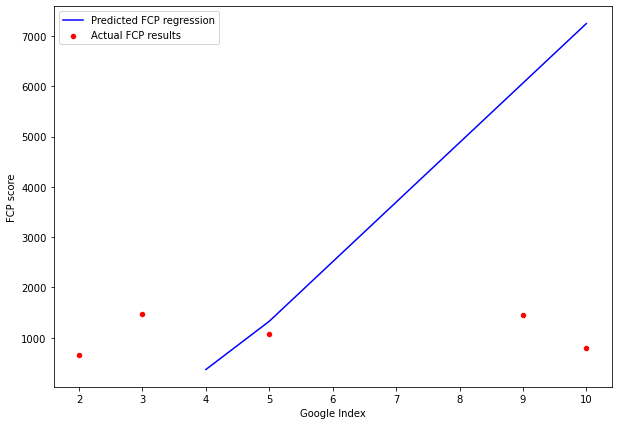

In [31]:
ax = prediction_dataframe.plot(x="index", y="fcp_avg", color="b", label="Predicted FCP regression", figsize=(10,7))
prediction_dataframe.plot(kind="scatter", x="index", y="fcp_actual", color="r", label="Actual FCP results", ax=ax)
ax.set_xlabel("Google Index")
ax.set_ylabel("FCP score")

As discussed earlier, our regression won't show us any useful results unfortunately. However, please make use of the code for further improvements!